In [2]:
import numpy as np
from numba import jit
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

In [3]:
image_counter = 30

def save_image(fig):
    global image_counter
    filename = "mandelbrodt_%d.png" % image_counter
    image_counter += 1
    fig.savefig(filename)

In [4]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)  
    
    save_image(fig)

In [5]:
@jit
def mandelbrot(z,maxiter,horizon,log_horizon):
    c = z
    for n in range(maxiter):
        az = abs(z)
        if az > horizon:
            return n - np.log(np.log(az))/np.log(2) + log_horizon
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter,horizon, log_horizon)
    return (r1,r2,n3)

@jit
def min_max(x,y,width,height):
    return x-(width/2), x+(width/2), y-(height/2), y+(height/2)

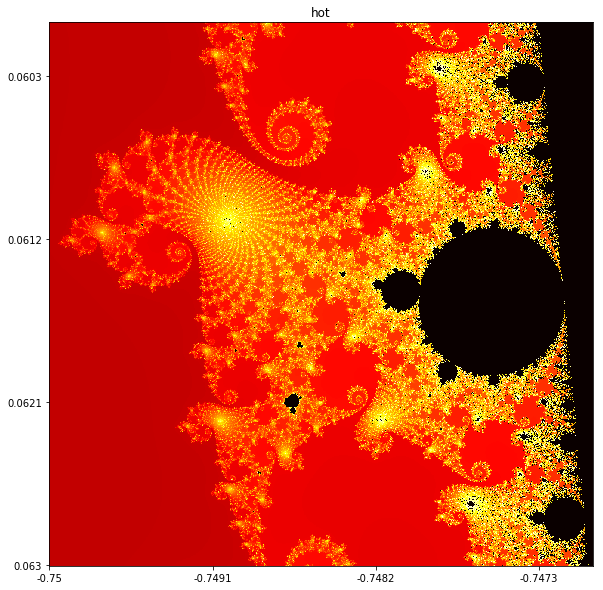

In [6]:
mandelbrot_image(-0.75,-0.747,0.063,0.06,cmap='hot',maxiter=4096)

In [7]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,0,'Areas')

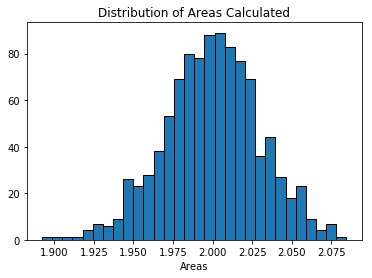

In [8]:
a = 0
b = np.pi #limits of integration
N = 1000

def func(x):
    return np.sin(x)

areas = []

for i in range(N):
    xrand = np.random.uniform(a,b,N)
    integral = 0.0

    for i in range(N):
        integral += func(xrand[i])

    areas.append((b-a)/float(N)*integral)

plt.title("Distribution of Areas Calculated")
plt.hist(areas,bins=30, ec="black")
plt.xlabel("Areas")

Text(0.5,0,'Areas')

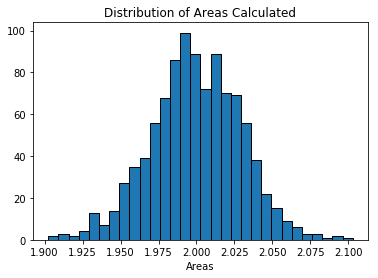

In [9]:
@jit
def mandelbrot(z,maxiter,horizon,log_horizon):
    c = z
    for n in range(maxiter):
        az = abs(z)
        if az > horizon:
            return n - np.log(np.log(az))/np.log(2) + log_horizon
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter,horizon, log_horizon)
    return (r1,r2,n3)

areas = []

for i in range(N):
    xrand = np.random.uniform(a,b,N)
    integral = 0.0

    for i in range(N):
        integral += func(xrand[i])

    areas.append((b-a)/float(N)*integral)

plt.title("Distribution of Areas Calculated")
plt.hist(areas,bins=30, ec="black")
plt.xlabel("Areas")

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random

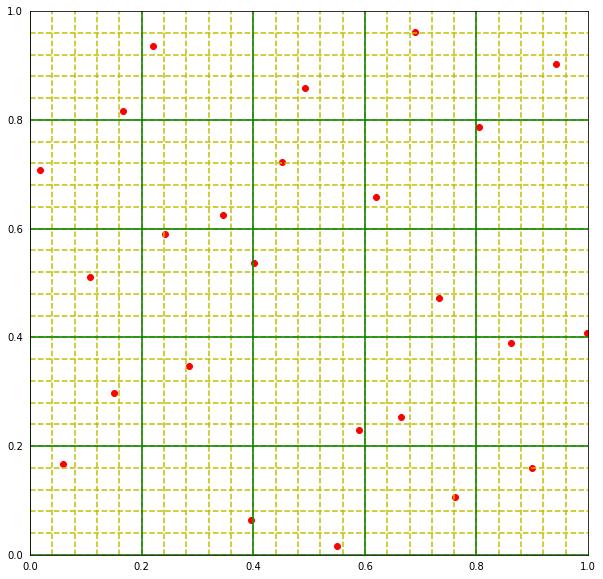

In [6]:
def lhs(n):
    lower_lim = np.arange(0,n)/n
    upper_lim = np.arange(1,n+1)/n
    
    points = np.random.uniform(low=lower_lim, high=upper_lim, size=[2,n]).T
    np.random.shuffle(points[:,1])

    return points

@jit
def ortho_sampling(n):
    qn = n ** 2
    ls = np.arange(0,qn)/qn
    us = np.arange(1,qn+1)/qn
    ll = np.arange(0,n)/n
    ul = np.arange(1,n+1)/n

    small_grid = np.zeros((len(ls), len(ls)))
    lrg_grid = np.zeros((len(ll), len(ll)))
    
    p = []
    
    for i, row in enumerate(lrg_grid):
        for j, column in enumerate(row):

            yboundsL = (ll[i],ul[i])
            xboundsL = (ll[j],ul[j])
                        
            check = True
            while check:
                xvalue = random.uniform(xboundsL[0], xboundsL[1])
                yvalue = random.uniform(yboundsL[0], yboundsL[1])
                                
                for k in range(n):
                    for l in range(n):
                        ki = i*n+k
                        kj = j*n+l
                        
                        if 1 not in small_grid[ki, :] and 1 not in small_grid[:, kj]:

                            yboundsS = (ls[ki], us[ki])
                            xboundsS = (ls[kj], us[kj])

                            if xboundsS[0] < xvalue < xboundsS[1] and yboundsS[0] < yvalue < yboundsS[1]:
                                p.append([xvalue, yvalue])
                                small_grid[ki][kj] = 1
                                check = False
                                break
            
    return p, ll, ls
  
a, ll, ls = ortho_sampling(5)
p = np.array(a)
plt.figure(figsize=[10,10])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0], p[:,1], c="r")
plt.hlines(ls,0,1, colors="y",linestyles='dashed')
plt.vlines(ls,0,1, colors="y",linestyles='dashed')
plt.hlines(ll,0,1, colors="g")
plt.vlines(ll,0,1, colors="g")
# Remove unnecessary ticks
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True) 

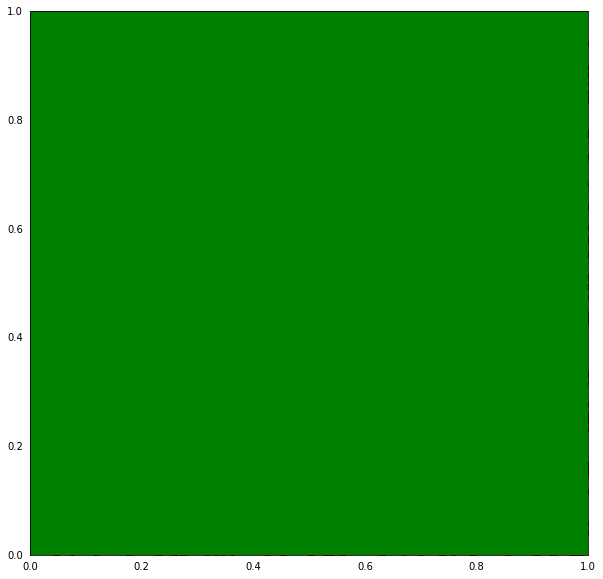

In [13]:
def lhs(n):
    lower_lim = np.arange(0,n)/n
    upper_lim = np.arange(1,n+1)/n
    
    points = np.random.uniform(low=lower_lim, high=upper_lim, size=[2,n]).T
    np.random.shuffle(points[:,1])

    return points, lower_lim

@jit
def ortho_sampling(n):
    qn = n ** 2
    ls = np.arange(0,qn)/qn
    us = np.arange(1,qn+1)/qn
    ll = np.arange(0,n)/n
    ul = np.arange(1,n+1)/n

    small_grid = np.zeros((len(ls), len(ls)))
    lrg_grid = np.zeros((len(ll), len(ll)))
    
    p = []
    
    for i, row in enumerate(lrg_grid):
        for j, column in enumerate(row):

            yboundsL = (ll[i],ul[i])
            xboundsL = (ll[j],ul[j])
                        
            check = True
            while check:
                xvalue = random.uniform(xboundsL[0], xboundsL[1])
                yvalue = random.uniform(yboundsL[0], yboundsL[1])
                                
                for k in range(n):
                    for l in range(n):
                        ki = i*n+k
                        kj = j*n+l
                        
                        if 1 not in small_grid[ki, :] and 1 not in small_grid[:, kj]:

                            yboundsS = (ls[ki], us[ki])
                            xboundsS = (ls[kj], us[kj])

                            if xboundsS[0] < xvalue < xboundsS[1] and yboundsS[0] < yvalue < yboundsS[1]:
                                p.append([xvalue, yvalue])
                                small_grid[ki][kj] = 1
                                check = False
                                break
            
    return p, ll, ls
  
a, ls = lhs(76**2)
p = np.array(a)
plt.figure(figsize=[10,10])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0], p[:,1], c="r")
plt.hlines(ls,0,1, colors="y")
plt.vlines(ls,0,1, colors="g")
# Remove unnecessary ticks
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True) 

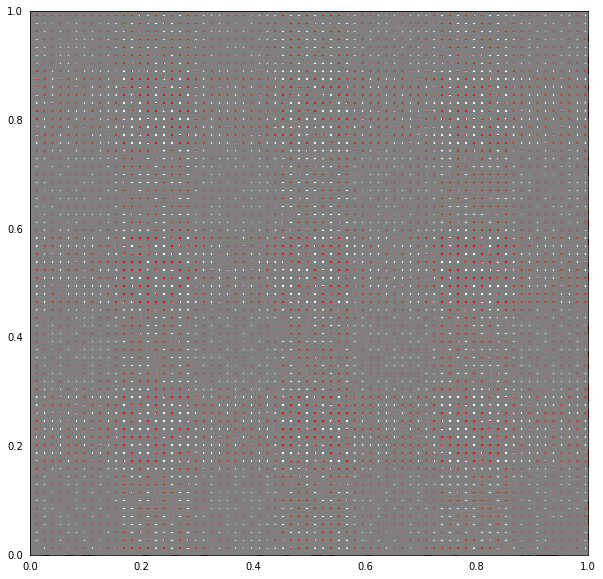

In [14]:
def randomz(n):
    points = []
    for i in range(n):
        x = random.random()
        y = random.random()
        points.append([x,y])
    return points

a = randomz(76**2)
p = np.array(a)
plt.figure(figsize=[10,10])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0], p[:,1], c="r")
plt.hlines(ls,0,1, colors="grey",linestyles='dashed')
plt.vlines(ls,0,1, colors="grey",linestyles='dashed')
# Remove unnecessary ticks
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True) 
    
    
            
    

In [299]:
a = np.array([[1,0], [0,0]])
if 1 in a[0, :]:
    print("whutwhuuuut")

whutwhuuuut


In [ ]:
    
#     points = []
#     for i in range(n):
#         for j in range(n):
#             x = random.uniform(ranges[i], ranges[i+1])
#             y = random.uniform(ranges[j], ranges[j+1])
#             points.append([x,y])
#     print(points)
# #             point = np.random()
# # #             print(point)
# #             points.extend(point)
            
# #     print(points)
# #         points = np.random.uniform(low=low_biggr, high=up_biggr, size=[2,n]).T
# #     print(points)
# #     np.random.shuffle(points[:,1])

#     return points
#     print(points)
#     data = {}
#     for i, point in enumerate(points):
#         print(i%n,point)
#         data.setdefault(i%n, [])
#         data[i%n].append(list(point))
#     print(data)
#     answer = []
#     for i in data:
#         temp = np.array(data[i])
#         np.random.shuffle(temp[:,1])
#         answer.extend(temp.tolist())
        
#     print(answer)
              
#     return answer

In [68]:
n = 9

lower_lim = np.arange(0,n)/n
print(lower_lim)
upper_lim = np.arange(1,n+1)/n
print(upper_lim)

points = np.random.uniform(low=lower_lim, high=upper_lim, size=[2,n]).T
print(points)
np.random.shuffle(points[:,1])
print(points)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
[[0.03487976 0.0046724 ]
 [0.08929023 0.08565457]
 [0.14601201 0.10561372]
 [0.17057303 0.16160421]
 [0.22949978 0.20309031]
 [0.27766312 0.27486493]
 [0.33361179 0.31732561]
 [0.356452   0.35783422]
 [0.44466599 0.43603554]
 [0.47076492 0.46243311]
 [0.52085803 0.53834278]
 [0.59458005 0.58899127]
 [0.60478391 0.64175697]
 [0.68536199 0.65048466]
 [0.70234998 0.70663925]
 [0.79066541 0.75930735]
 [0.82181821 0.84714446]
 [0.88093552 0.89563699]
 [0.94019039 0.92225268]
 [0.95914569 0.9997456 ]]
[[0.03487976 0.0046724 ]
 [0.08929023 0.9997456 ]
 [0.14601201 0.64175697]
 [0.17057303 0.35783422]
 [0.22949978 0.46243311]
 [0.27766312 0.53834278]
 [0.33361179 0.08565457]
 [0.356452   0.27486493]
 [0.44466599 0.84714446]
 [0.47076492 0.20309031]
 [0.52085803 0.58899127]
 [0.59458005 0.6504

<function matplotlib.pyplot.show>

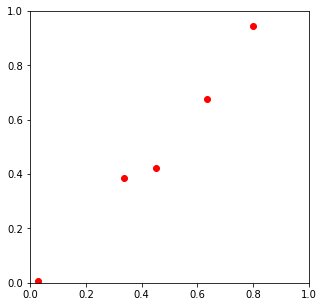

In [262]:
n = 5
p = np.array(lhs(n))

plt.figure(figsize=[5,5])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0], p[:,1], c="r")

plt.show

<function matplotlib.pyplot.show>

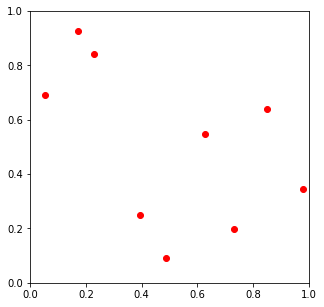

In [168]:
n = 9
p = lhs(n)

plt.figure(figsize=[5,5])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0], p[:,1], c="r")

plt.show

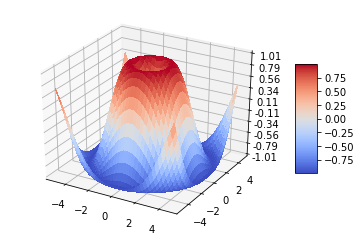

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

nums = 50
x = np.linspace(1, 10000, num=nums)
y = np.linspace(1, 800, num=nums)
z = []
y, x = np.meshgrid(y, x)

for i in range(len(y)):
    temp = []
    for j in range(len(y[i])):
        temp.append(MonteCarlo(y[i][j], x[i][j], -2.0, 0.5, -1.25, 1.25))
    z.append(temp)
z = np.array(z)
    
print(x.shape, y.shape, z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(min(min(z)), max(max(z)))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()